![Alt text](pic.png)

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [14]:
def estimate_m_values(data, strain_rate_columns, strain_rates, temp, plot=True):
    """
    Estimate m0 and m1 for each strain by fitting a custom function to log-log data and visualize the results.
    """
    m_values = []
    
    # Define the function to fit the log-log data
    def wagoner(strain_rate, m0, m1):
        return m0 * (np.sqrt(strain_rate * 0.0001) ** m1) * (np.log(strain_rate / 0.0001))

    for i in range(len(data)):
        # Extract stress values for different strain rates for the current row
        stress_values = data.iloc[i][strain_rate_columns].values
        log_stress = np.log(stress_values)

        # Fit the function to the data to estimate m0 and m1
        try:
            popt, _ = curve_fit(wagoner, strain_rates, log_stress, maxfev = 100000)
            m0, m1 = popt
        except RuntimeError as e:
            print(f"Fit did not converge for strain index {i}: {e}")
            m0, m1 = np.nan, np.nan  # Handle failed fits gracefully

        # Append the estimated m0, m1, and corresponding strain
        m_values.append({
            'strain': data['strain'].iloc[i],
            'm0_estimated': m0,
            'm1_estimated': m1
        })
    
    # Convert m_values to a DataFrame
    df = pd.DataFrame(m_values)
    
    if plot:
        # Plotting real vs predicted stress for each strain rate
        strain = data['strain']
        for strain_rate, col in zip(strain_rates, strain_rate_columns):
            fitted_stress = [wagoner(strain_rate, m0, m1) for m0, m1 in zip(df['m0_estimated'], df['m1_estimated'])]
            real_stress = data[col]
            plt.plot(strain, fitted_stress, label=f'Predicted StrRt{strain_rate}')
            plt.scatter(strain, real_stress, color='red', label=f'Real StrRt{strain_rate}')
            plt.xlabel('Strain')
            plt.ylabel('Normalized Stress')
            plt.title(f'Real vs Predicted Stress for StrRt{strain_rate} {temp}K')
            plt.legend()
            plt.show()
    
    # Save m values to a CSV
    df.to_csv(f'w_m_values_{temp}.csv', index=False)
    return df

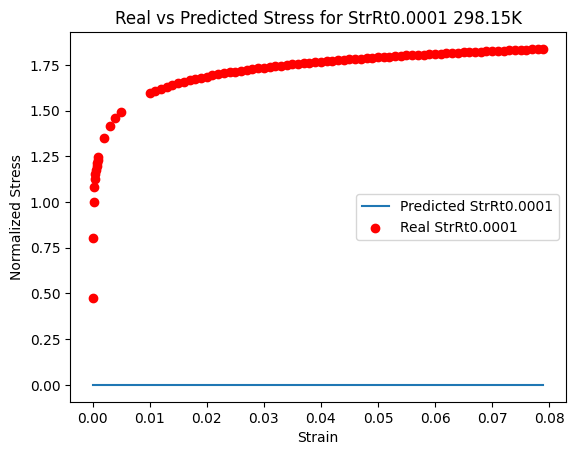

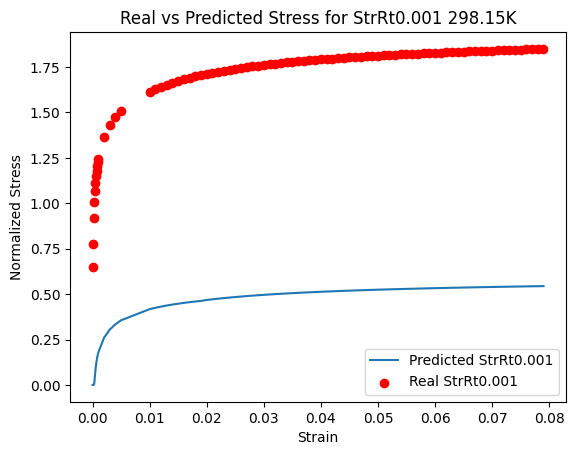

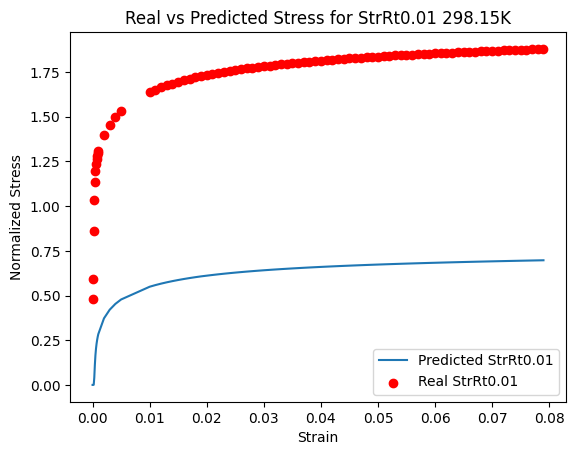

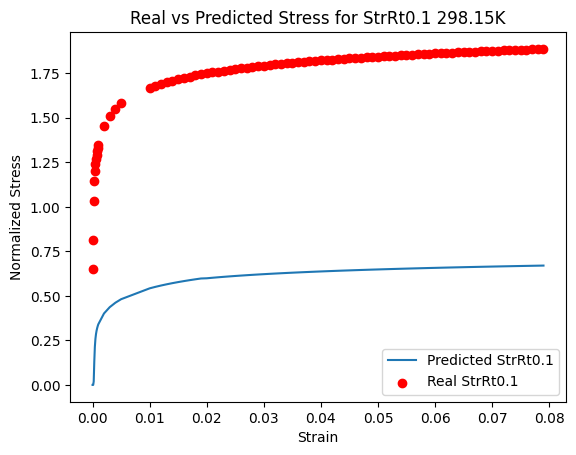

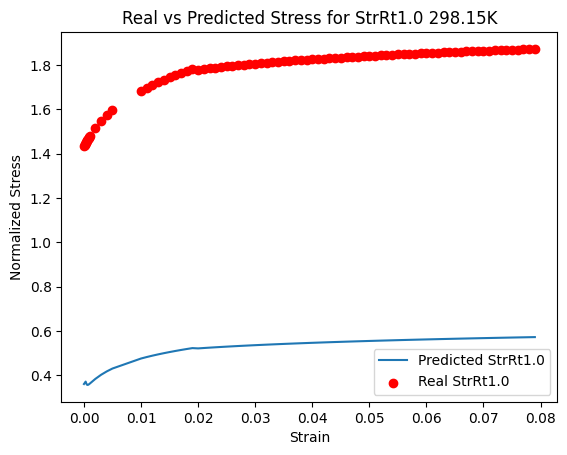

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


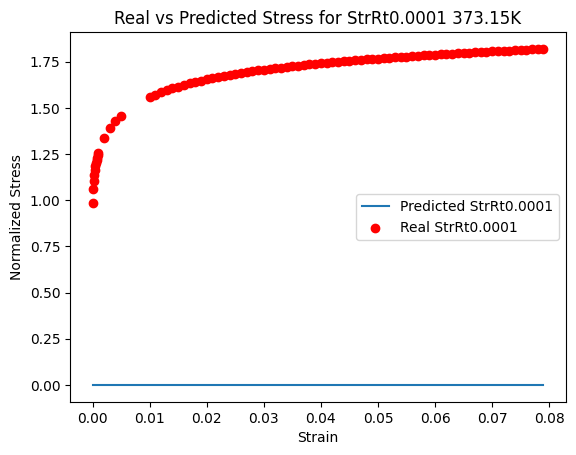

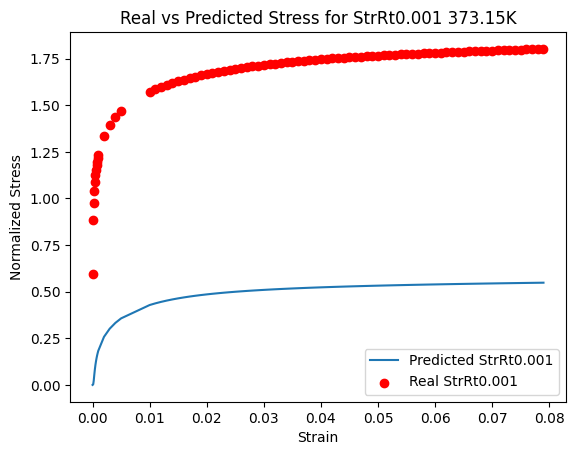

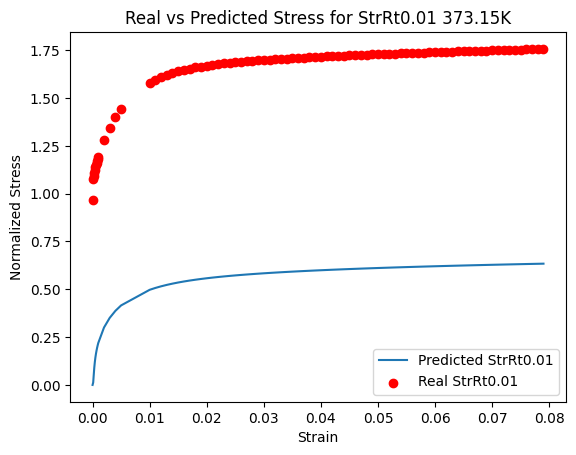

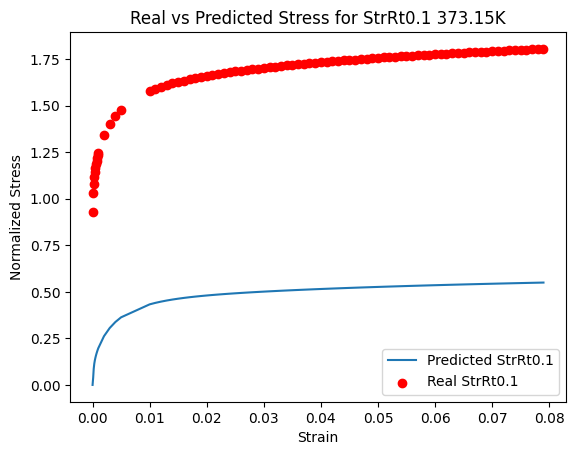

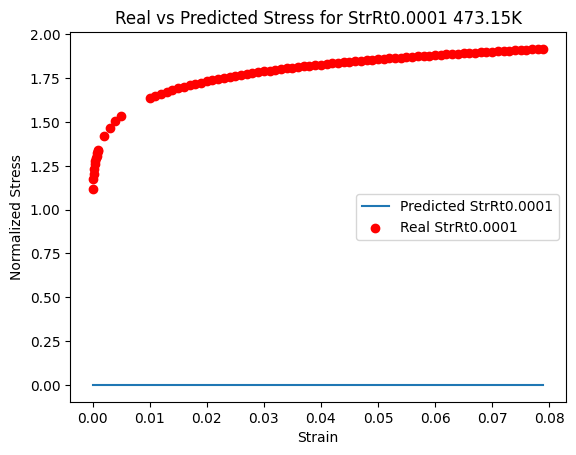

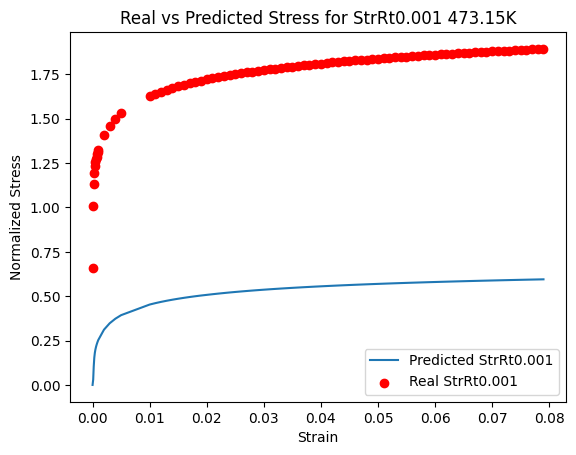

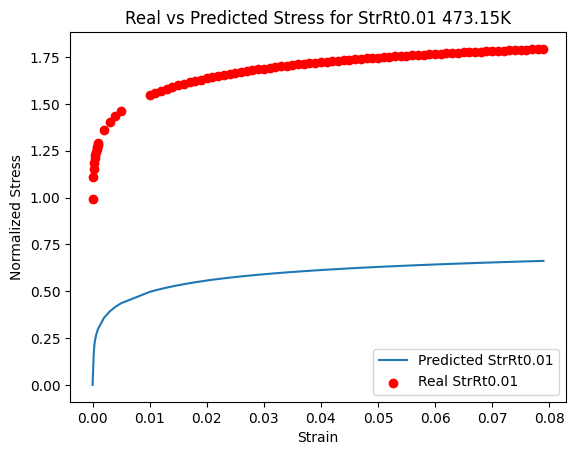

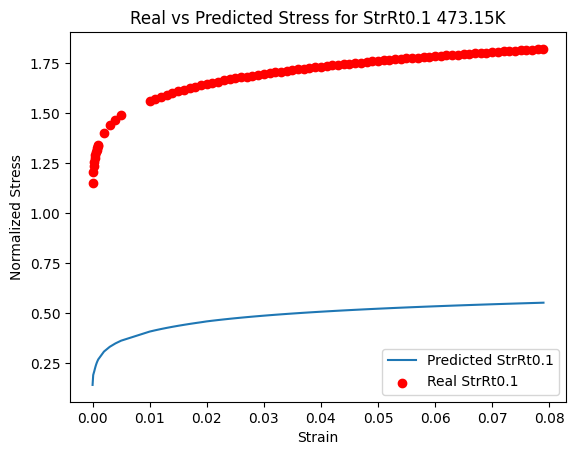

/var/folders/n_/7tqgdxqs259f7cnfxbsjqzwm0000gp/T/ipykernel_24830/2700541133.py:9: RuntimeWarning: overflow encountered in power
  return m0 * (np.sqrt(strain_rate * 0.0001) ** m1) * (np.log(strain_rate / 0.0001))
/var/folders/n_/7tqgdxqs259f7cnfxbsjqzwm0000gp/T/ipykernel_24830/2700541133.py:9: RuntimeWarning: invalid value encountered in multiply
  return m0 * (np.sqrt(strain_rate * 0.0001) ** m1) * (np.log(strain_rate / 0.0001))


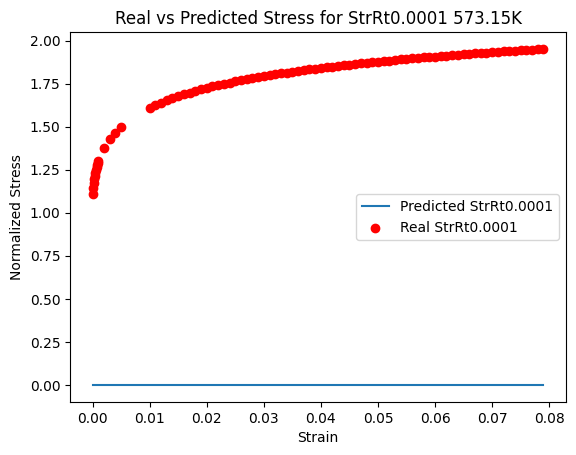

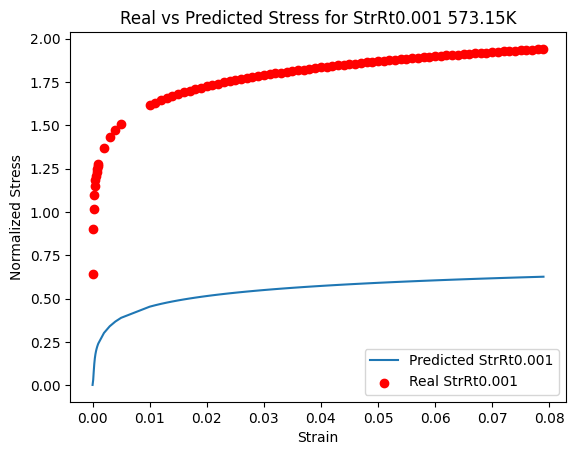

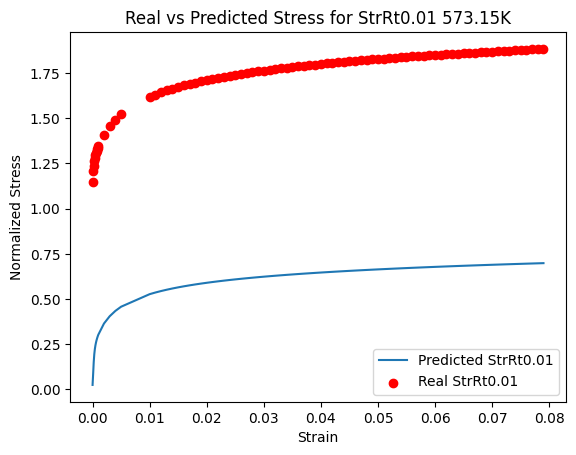

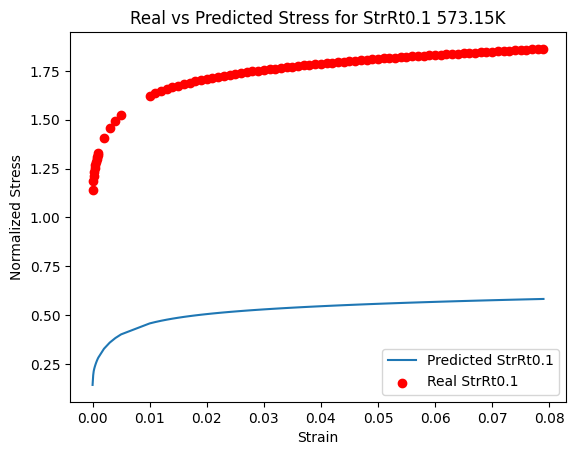

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/n_/7tqgdxqs259f7cnfxbsjqzwm0000gp/T/ipykernel_24830/2700541133.py:9: RuntimeWarning: overflow encountered in power
  return m0 * (np.sqrt(strain_rate * 0.0001) ** m1) * (np.log(strain_rate / 0.0001))
/var/folders/n_/7tqgdxqs259f7cnfxbsjqzwm0000gp/T/ipykernel_24830/2700541133.py:9: RuntimeWarning: invalid value encountered in multiply
  return m0 * (np.sqrt(strain_rate * 0.0001) ** m1) * (np.log(strain_rate / 0.0001))
/var/folders/n_/7tqgdxqs259f7cnfxbsjqzwm0000gp/T/ipykern

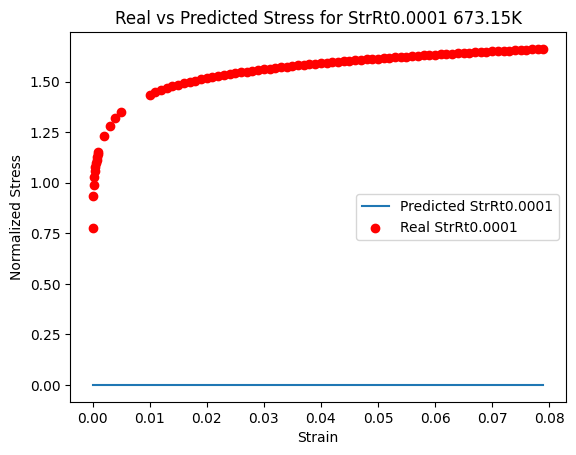

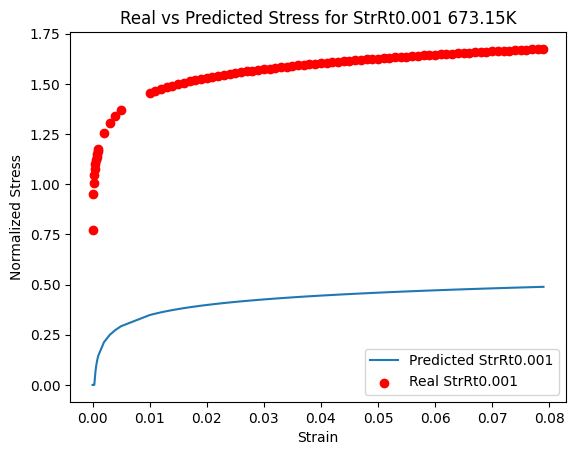

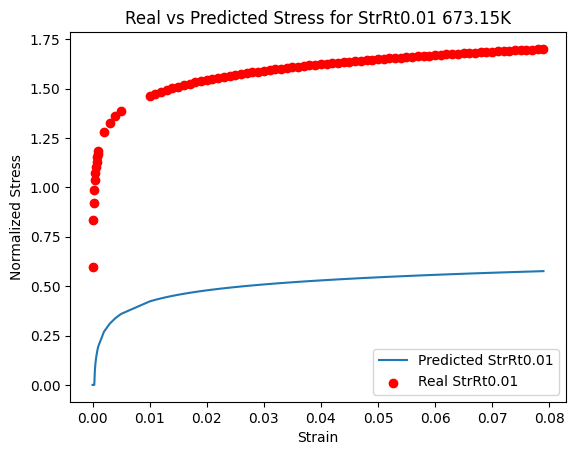

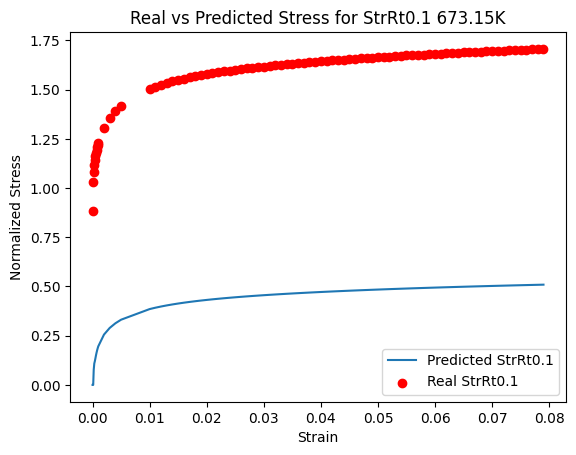

In [15]:
temp = '298.15'
strain_rates = np.array([0.0001, 0.001, 0.01, 0.1, 1])
strain_rate_columns = ['ref_StrRt0.0001', 'ref_StrRt0.001', 'ref_StrRt0.01', 'ref_StrRt0.1', 'ref_StrRt1']

data = pd.read_csv(f"../Tmp{temp}_RD.csv")
estimate_m_values(data, strain_rate_columns, strain_rates, temp)

temps = ['373.15', '473.15', '573.15', '673.15']
strain_rates = np.array([0.0001, 0.001, 0.01, 0.1])
strain_rate_columns = ['ref_StrRt0.0001', 'ref_StrRt0.001', 'ref_StrRt0.01', 'ref_StrRt0.1']

for temp in temps:
    data = pd.read_csv(f"../Tmp{temp}_RD.csv")
    estimate_m_values(data, strain_rate_columns, strain_rates, temp)